In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read the data using pandas read_csv function
data = pd.read_csv("/content/drive/MyDrive/Motor_Vehicle_Collisions_-_Crashes_20250110.csv")

<ipython-input-10-39d1cdb0442b>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/MyDrive/Motor_Vehicle_Collisions_-_Crashes_20250110.csv")


In [ ]:
# Print the first 5 rows of the data using head function of pandas
print(data.head())

   CRASH DATE CRASH TIME   BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
0  09/11/2021       2:39       NaN      NaN        NaN        NaN   
1  03/26/2022      11:45       NaN      NaN        NaN        NaN   
2  06/29/2022       6:55       NaN      NaN        NaN        NaN   
3  09/11/2021       9:35  BROOKLYN  11208.0  40.667202 -73.866500   
4  12/14/2021       8:13  BROOKLYN  11233.0  40.683304 -73.917274   

                  LOCATION           ON STREET NAME CROSS STREET NAME  \
0                      NaN    WHITESTONE EXPRESSWAY         20 AVENUE   
1                      NaN  QUEENSBORO BRIDGE UPPER               NaN   
2                      NaN       THROGS NECK BRIDGE               NaN   
3    (40.667202, -73.8665)                      NaN               NaN   
4  (40.683304, -73.917274)          SARATOGA AVENUE    DECATUR STREET   

           OFF STREET NAME  ...  CONTRIBUTING FACTOR VEHICLE 2  \
0                      NaN  ...                    Unspecified   
1             

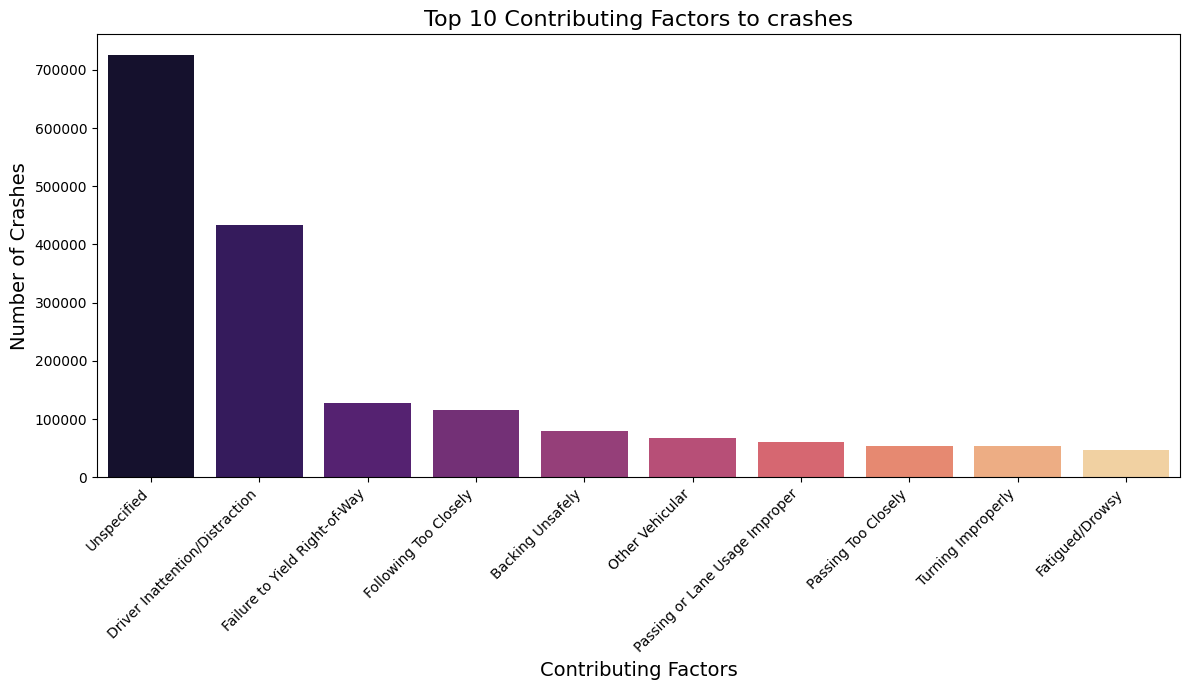

In [ ]:
# Plot a Bar Chart
top_factors = data['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().head(10)

plt.figure(figsize=(12, 7))
# Plotting the top contributing factors, fill in x as the index field of the variable 'top_factors'
sns.barplot(x=top_factors.index, y=top_factors.values, hue=top_factors.index, palette="magma", legend=False)
plt.title('Top 10 Contributing Factors to crashes', fontsize=16)
plt.xlabel('Contributing Factors', fontsize=14)
plt.ylabel('Number of Crashes', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

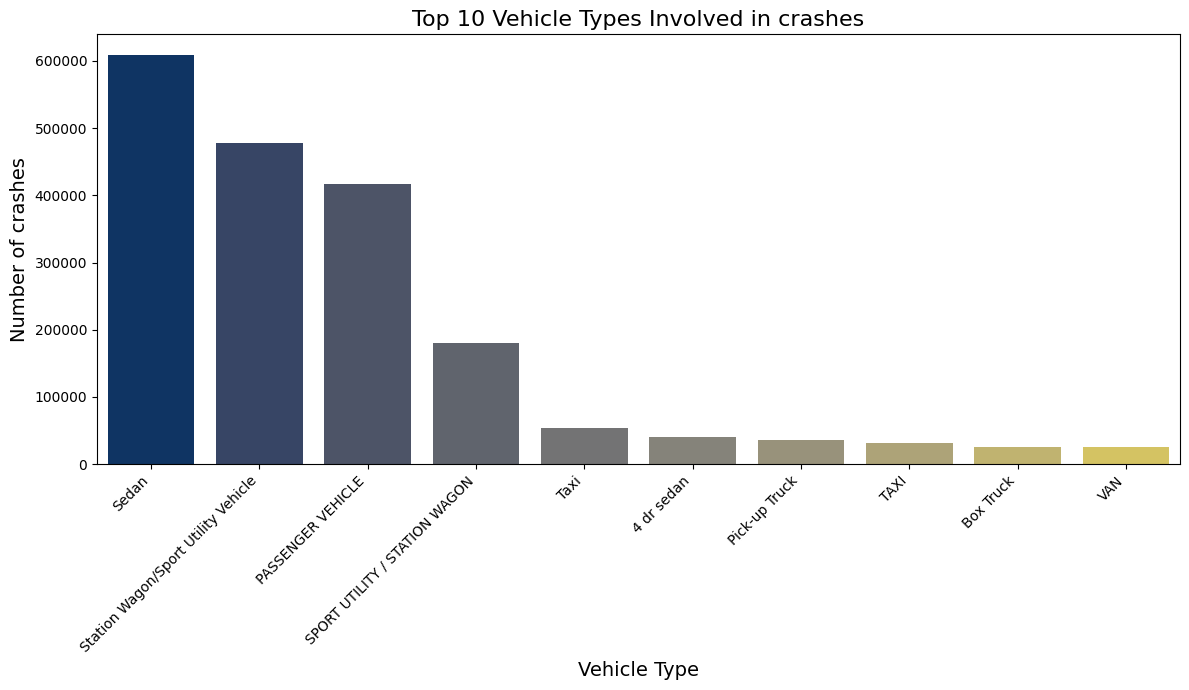

In [ ]:
# Determine the top vehicle types involved in crashes
top_vehicle_types = data['VEHICLE TYPE CODE 1'].value_counts().head(10)

# Plotting the top vehicle types
plt.figure(figsize=(12, 7))
sns.barplot(x=top_vehicle_types.index, y=top_vehicle_types.values, hue=top_vehicle_types.index, palette="cividis", dodge=False, legend=False)
plt.title('Top 10 Vehicle Types Involved in crashes', fontsize=16)
plt.xlabel('Vehicle Type', fontsize=14)
plt.ylabel('Number of crashes', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


The top 3 vehicles that were most involved in crashes:


> *   Sedan
> *   Station Wagon/Sport Utility Vehicle
> *   Passenger Vehicle








<ipython-input-17-1d14d8e1a468>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='crash Type', data=crash_types_df, palette="mako")


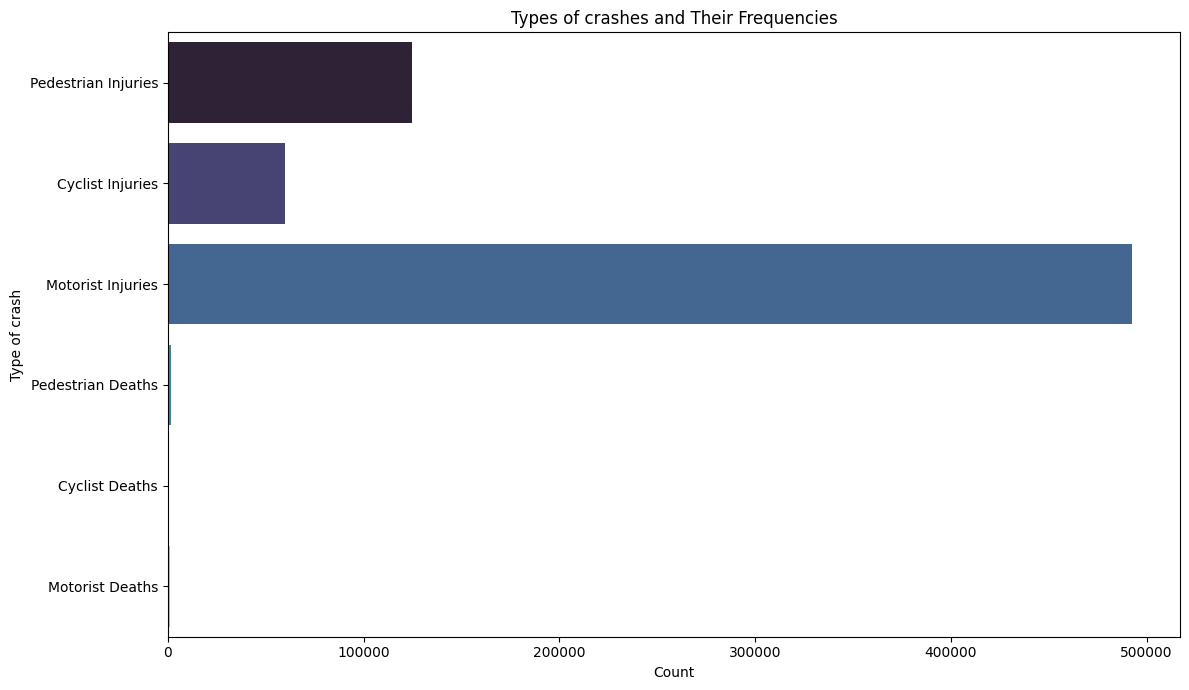

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregating data - Complete for Cyclist and Motorist
types_of_crashes = {
    'Pedestrian Injuries': data['NUMBER OF PEDESTRIANS INJURED'].sum(),
    'Cyclist Injuries': data['NUMBER OF CYCLIST INJURED'].sum(),
    'Motorist Injuries': data['NUMBER OF MOTORIST INJURED'].sum(),
    'Pedestrian Deaths': data['NUMBER OF PEDESTRIANS KILLED'].sum(),
    'Cyclist Deaths': data['NUMBER OF CYCLIST KILLED'].sum(),
    'Motorist Deaths': data['NUMBER OF MOTORIST KILLED'].sum()
}

# Converting to DataFrame for easier plotting - we want the items in the dictionary, use the items function
crash_types_df = pd.DataFrame(list(types_of_crashes.items()), columns=['crash Type', 'Count'])

# Plot
plt.figure(figsize=(12, 7))
sns.barplot(x='Count', y='crash Type', data=crash_types_df, palette="mako")
plt.title('Types of crashes and Their Frequencies')
plt.xlabel('Count')
plt.ylabel('Type of crash')
plt.tight_layout()
plt.show()


<ipython-input-3-98550eebfd7b>:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)
<ipython-input-3-98550eebfd7b>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_crashes_per_hour.index, y=average_crashes_per_hour.values, palette="viridis")


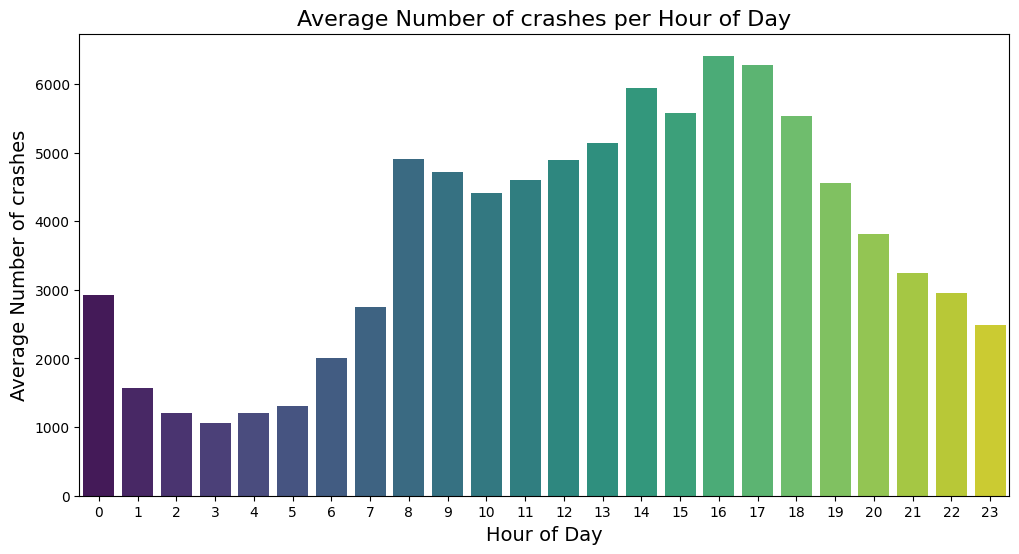

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
file_path = "/content/drive/MyDrive/Motor_Vehicle_Collisions_-_Crashes_20250110.csv"
data = pd.read_csv(file_path)

# Convert 'CRASH DATE' and 'CRASH TIME' to datetime
data['CRASH DATE'] = pd.to_datetime(data['CRASH DATE'])
data['CRASH TIME'] = pd.to_datetime(data['CRASH TIME'], format='%H:%M')

# Time of Day Analysis
data['Hour of Day'] = data['CRASH TIME'].dt.hour

# Group by 'Hour of Day' and calculate the average number of crashes per hour
average_crashes_per_hour = data.groupby('Hour of Day').size() / data['Hour of Day'].nunique()

# Plot the average number of crashes
plt.figure(figsize=(12, 6))
sns.barplot(x=average_crashes_per_hour.index, y=average_crashes_per_hour.values, palette="viridis")
plt.title('Average Number of crashes per Hour of Day', fontsize = 16)
plt.xlabel('Hour of Day', fontsize = 14)
plt.ylabel('Average Number of crashes', fontsize = 14)
plt.xticks(range(0, 24))
plt.show()




> *  The chart shows that the late afternoon (2 pm to 6 pm) sees the most crashes.

> *  Possible reasons: Rush hour traffic, fatigue and distractions, low sun angles or sunset glare during the late afternoon and early evening.


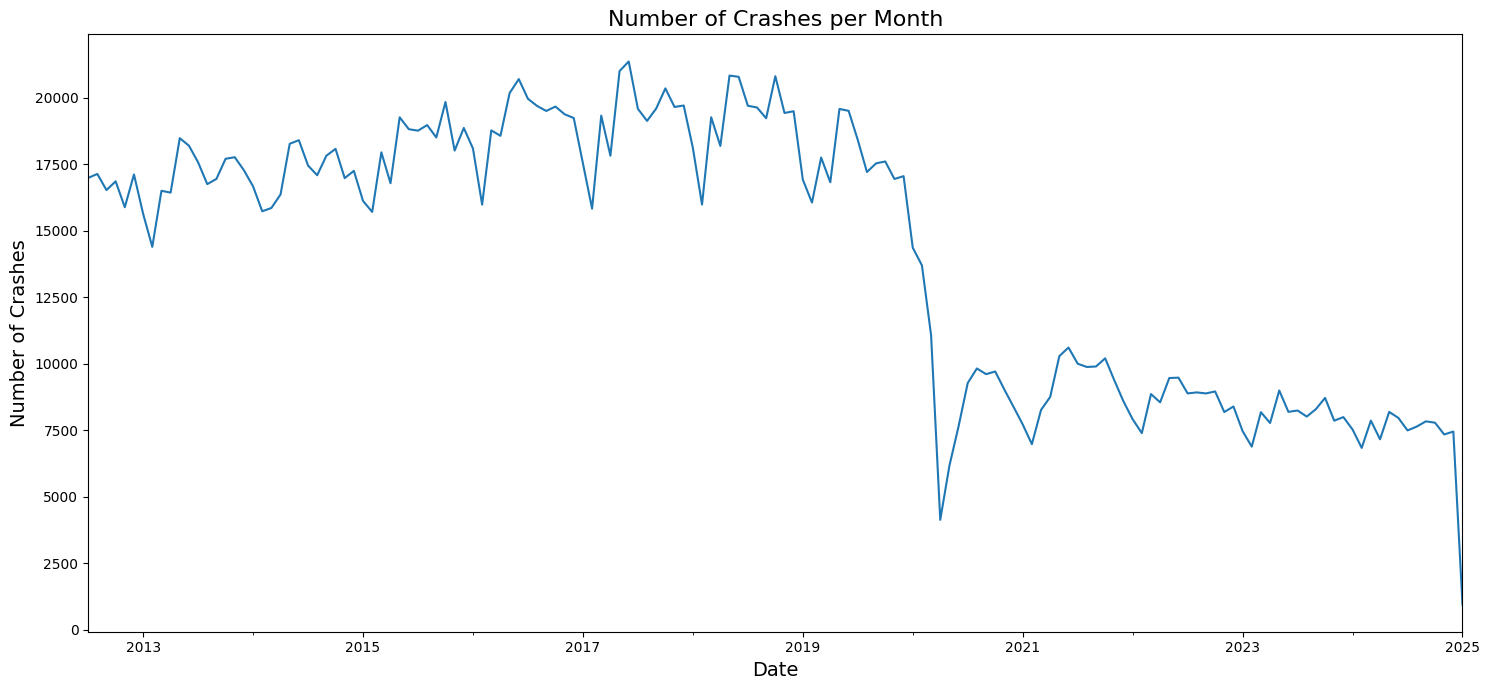

In [ ]:
# Convert 'CRASH DATE' to datetime format
data['CRASH DATE'] = pd.to_datetime(data['CRASH DATE'])

# Group by month and year to get the number of crashes per month
monthly_crashes = data.groupby(data['CRASH DATE'].dt.to_period("M")).size()

# Plotting the trend over time
plt.figure(figsize=(15, 7))
monthly_crashes.plot()
plt.title('Number of Crashes per Month', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Crashes', fontsize=14)
plt.tight_layout()
plt.show()

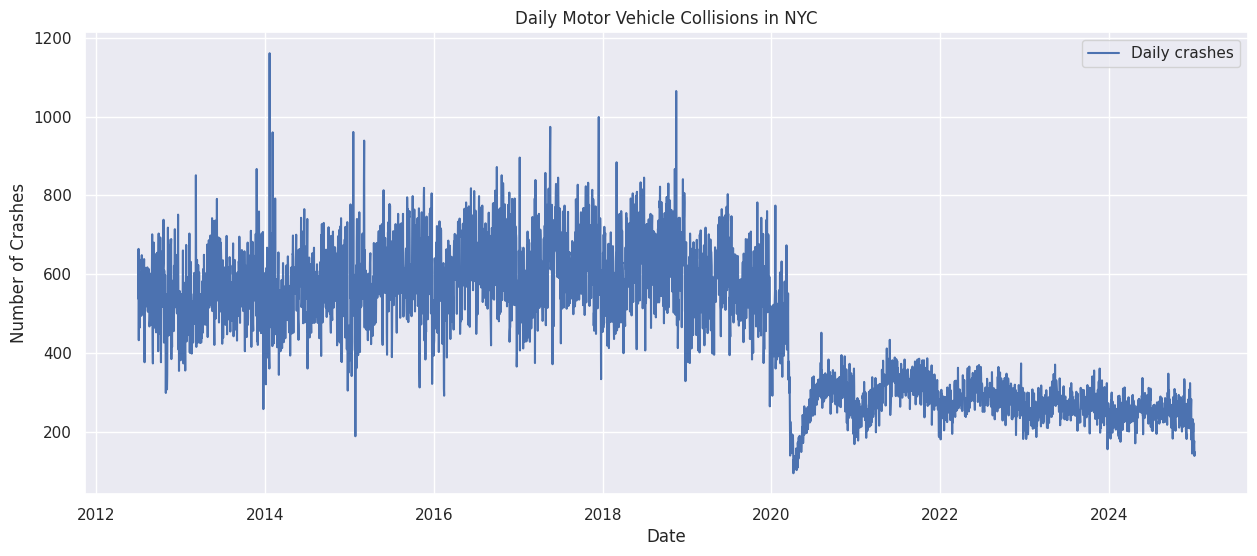

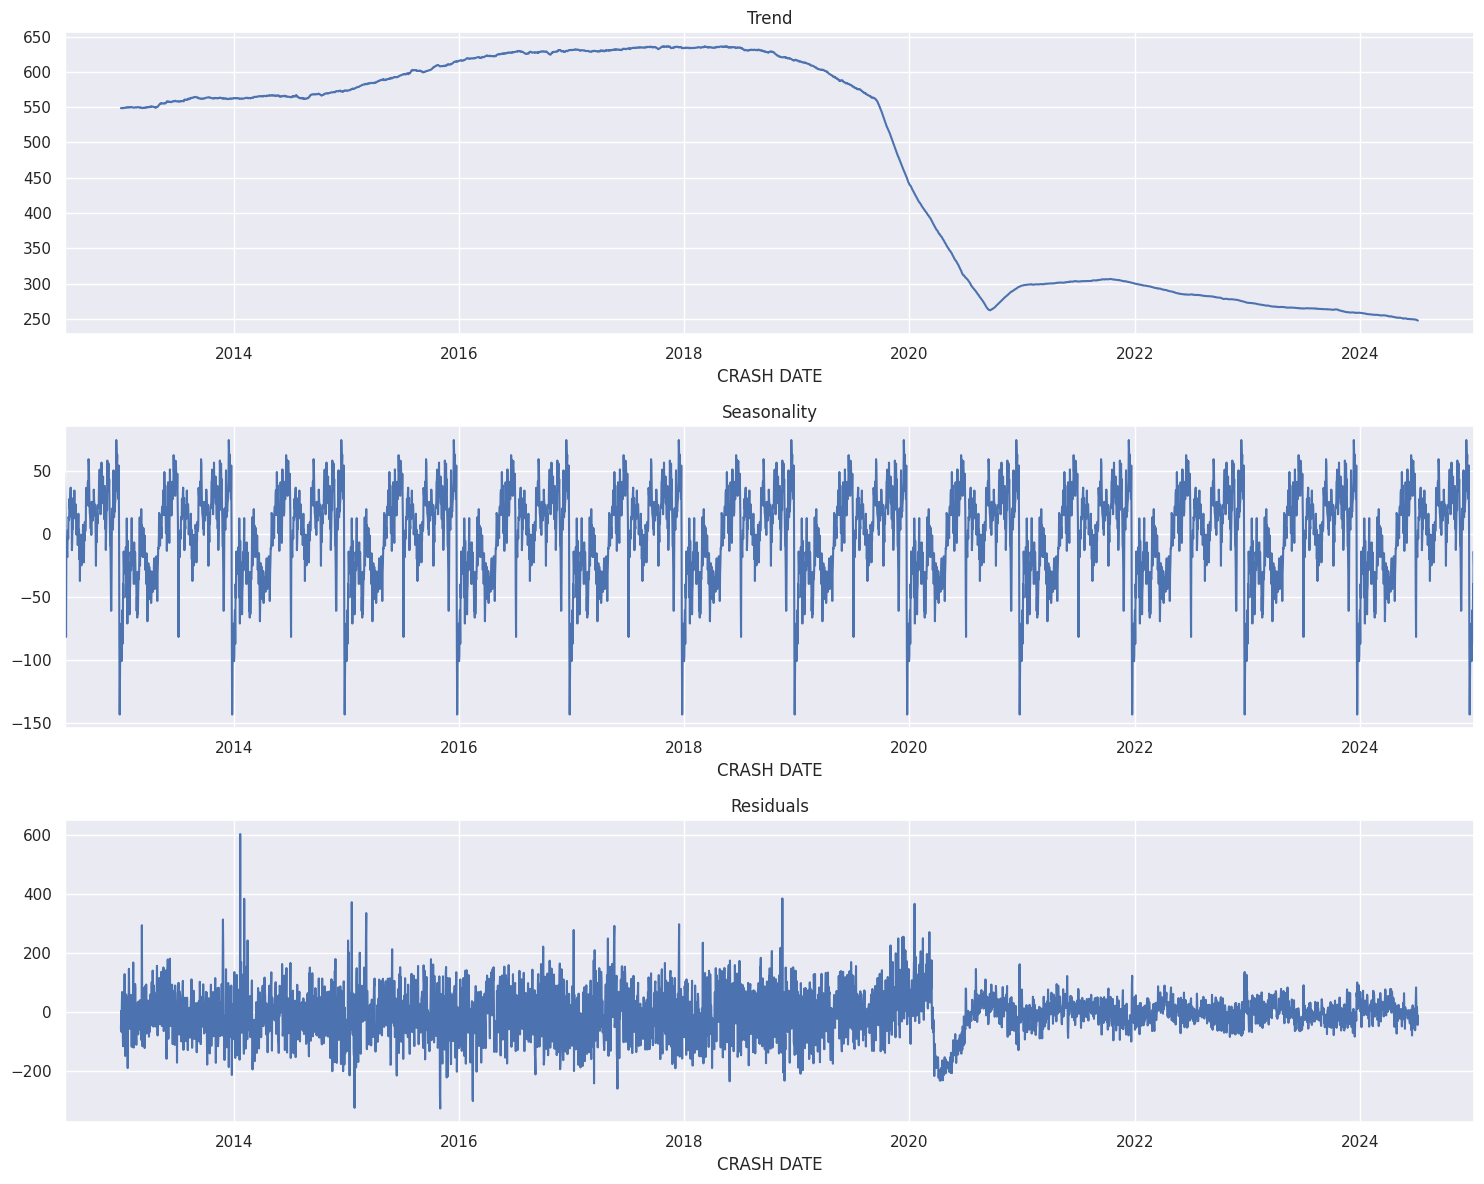

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Count the number of crashes per day, group by CRASH DATE
daily_crashes = data.groupby('CRASH DATE').size()

# Set plot style
sns.set(style="darkgrid")

# Plot the daily crashes time series
plt.figure(figsize=(15, 6))
plt.plot(daily_crashes, label='Daily crashes')
plt.title('Daily Motor Vehicle Collisions in NYC')
plt.xlabel('Date')
plt.ylabel('Number of Crashes')
plt.legend()
plt.show()

# Decompose the time series
decomposition = seasonal_decompose(daily_crashes, model='additive', period=365)

# Plot the decomposed components
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 12))
decomposition.trend.plot(ax=ax1)
ax1.set_title('Trend')
decomposition.seasonal.plot(ax=ax2)
ax2.set_title('Seasonality')
decomposition.resid.plot(ax=ax3)
ax3.set_title('Residuals')
plt.tight_layout()
plt.show()

> *  Based on the trend graph, there was a steady increase in crashes from 2014 to around 2018. After 2018, the number of crashes began to stabilize or slightly decrease. However, starting near the last quarter of 2019, there is a sharp and significant decrease in crashes, likely due to the COVID-19 pandemic and related lockdown measures. While there is a slight increase from around the second half of 2020 to almost the end of 2021, the overall downward trend resumes afterward, reflecting the long-term impact of reduced road usage and potentially permanent changes in traffic patterns (e.g., remote work and decreased travel).

> *  From the residual graph, there is a significant unpredicted fluctuation in 2020. This aligns with the onset of the COVID-19 pandemic, which caused drastic and unforeseen changes in road usage, including reduced traffic and fewer crashes. These fluctuations are due to the unprecedented circumstances of the pandemic and are not explained by the trend or seasonal patterns.

---

<ipython-input-6-4f14068022f4>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=borough_count.index, y=borough_count.values, palette="viridis")


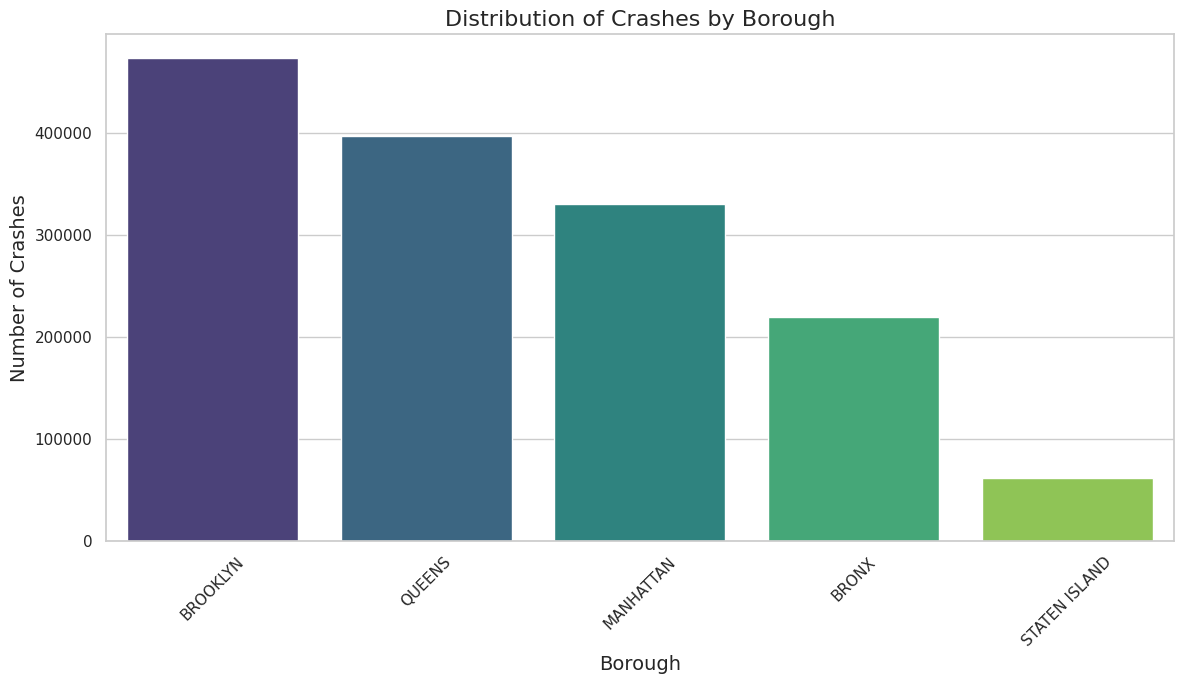

In [ ]:
# Plot a bar chart to compare the number of crashes that occurred in each of the five boroughs.
# Set style
sns.set_style("whitegrid")

# Plotting the distribution of crashes by borough
plt.figure(figsize=(12, 7))
# Find the count of unique values of BOROUGHS.
borough_count = data['BOROUGH'].value_counts()
sns.barplot(x=borough_count.index, y=borough_count.values, palette="viridis")
plt.title('Distribution of Crashes by Borough', fontsize=16)
plt.xlabel('Borough', fontsize=14)
plt.ylabel('Number of Crashes', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

> * Highest: Brooklyn
> * Lowest: Staten Island


> *  **Population Density**: With the highest number of crashes, Brooklyn is one of the most populous boroughs in New York City. More people mean more vehicles, pedestrians, and cyclists, which increases the likelihood of crashes. Staten Island has the lowest population density and fewer residents, resulting in lower traffic volume and, consequently, fewer crashes.

> *  **Traffic Volume**: Brooklyn experiences heavy traffic due to its connectivity to Manhattan (via bridges and tunnels) and its status as a residential and commercial hub. Staten Island has fewer major roadways and less through traffic, which contributes to its lower crash count.

> * **Urban Infrastructure**: Boroughs like Brooklyn, Queens, and Manhattan have dense urban layouts with narrow streets, more intersections, bike lanes, and complex traffic patterns, all of which contribute to increased crash risks. Staten Island has more suburban characteristics, with wider streets and simpler road network, reducing crash risks.

In [ ]:
# Create a heatmap leveraging the latitude and longitude variables to determine where the most crashes are occurring
from folium.plugins import HeatMap

# Drop rows with missing latitude and longitude values
data_geo = data.dropna(subset=['LATITUDE', 'LONGITUDE'])

# Create a base map
m = folium.Map(location=[40.730610, -73.935242], zoom_start=10)  # Centered around NYC

# Create a heatmap
heat_data = [[row['LATITUDE'], row['LONGITUDE']] for index, row in data_geo.iterrows()]
HeatMap(heat_data, radius=8, max_zoom=13).add_to(m)

m.save("Heatmap.html")


> *  Based on the heatmap, the concentration of crashes is most prominent in Manhattan and parts of Brooklyn, particularly near downtown Manhattan and the Brooklyn-Queens Expressway (BQE). These areas have a high density of traffic due to their significance as commercial, residential, and transit hubs. Other noticeable concentrations are along major highways and intersections connecting to bridges, such as those leading to Queens and the Bronx.

In [ ]:
# Building a heatmap base on severity
# Sample a subset of the data for visualization
sample_data_severity = data_geo.sample(n=1000, random_state=42)

# Create a base map
m_severity = folium.Map(location=[40.730610, -73.935242], zoom_start=10)

# Add crashes to the map with color coding and shape coding based on severity
for index, row in sample_data_severity.iterrows():
    if row['NUMBER OF PERSONS KILLED'] > 0:
        color = "red"  # Fatalities

        folium.features.RegularPolygonMarker(
          location=[row['LATITUDE'], row['LONGITUDE']],
          number_of_sides=3,
          radius=5,
          gradient = False,
          color=color,
          fill=True,
          fill_color=color
        ).add_to(m_severity)


    elif row['NUMBER OF PERSONS INJURED'] > 0:
        color = "orange"  # Injuries
        folium.CircleMarker(
          location=[row['LATITUDE'], row['LONGITUDE']],
          radius=5,
          color=color,
          fill=True,
          fill_color=color
       ).add_to(m_severity)
    else:
        color = "blue"  # No injuries or fatalities
        folium.features.RegularPolygonMarker(
          location=[row['LATITUDE'], row['LONGITUDE']],
          number_of_sides=4,
          radius=5,
          gradient = False,
          color=color,
          fill=True,
          fill_color=color
        ).add_to(m_severity)


m_severity.save("severity.html")


> *  The intersection near the Grand Central Parkway, close to the USTA Billie Jean King National Tennis Center and Queens Zoo, appears to be one of the most dangerous locations on the severity map. This area likely sees a high volume of crashes, including fatal ones, due to the combination of high-speed highway traffic, multiple ramps and exits, and heavy pedestrian and vehicle activity during events at nearby attractions.

> *  **Question 1**: Which day of the week sees the highest number of crashes, injuries, and fatalities?
> *  **Reason**: Understanding weekly patterns can help optimize law enforcement deployment, public awareness campaigns, and community outreach efforts.

> * **Question 2**: Which borough sees the most crashes, and what are the underlying factors?
> * **Reason**: Identifying hotspots can lead to recommendations for improved infrastructure or traffic management.

In [ ]:
# Group Data by Day of the Week
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure CRASH DATE is in datetime format
data['CRASH DATE'] = pd.to_datetime(data['CRASH DATE'])

# Create a new column for day of the week
data['Day of Week'] = data['CRASH DATE'].dt.day_name()

# Group by day of the week and calculate totals for crashes, injuries, and fatalities
weekly_data = data.groupby('Day of Week').agg({
    'NUMBER OF PERSONS INJURED': 'sum',
    'NUMBER OF PERSONS KILLED': 'sum',
    'CRASH DATE': 'count'
}).rename(columns={'CRASH DATE': 'Total Crashes'})

# Sort data by day of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_data = weekly_data.reindex(day_order)

print(weekly_data)


             NUMBER OF PERSONS INJURED  NUMBER OF PERSONS KILLED  \
Day of Week                                                        
Monday                         95643.0                     496.0   
Tuesday                        97547.0                     429.0   
Wednesday                      97217.0                     408.0   
Thursday                       98106.0                     442.0   
Friday                        105715.0                     491.0   
Saturday                       98944.0                     540.0   
Sunday                         93278.0                     507.0   

             Total Crashes  
Day of Week                 
Monday              306874  
Tuesday             315939  
Wednesday           313687  
Thursday            320713  
Friday              341932  
Saturday            289813  
Sunday              258934  


---

<Figure size 1200x700 with 0 Axes>

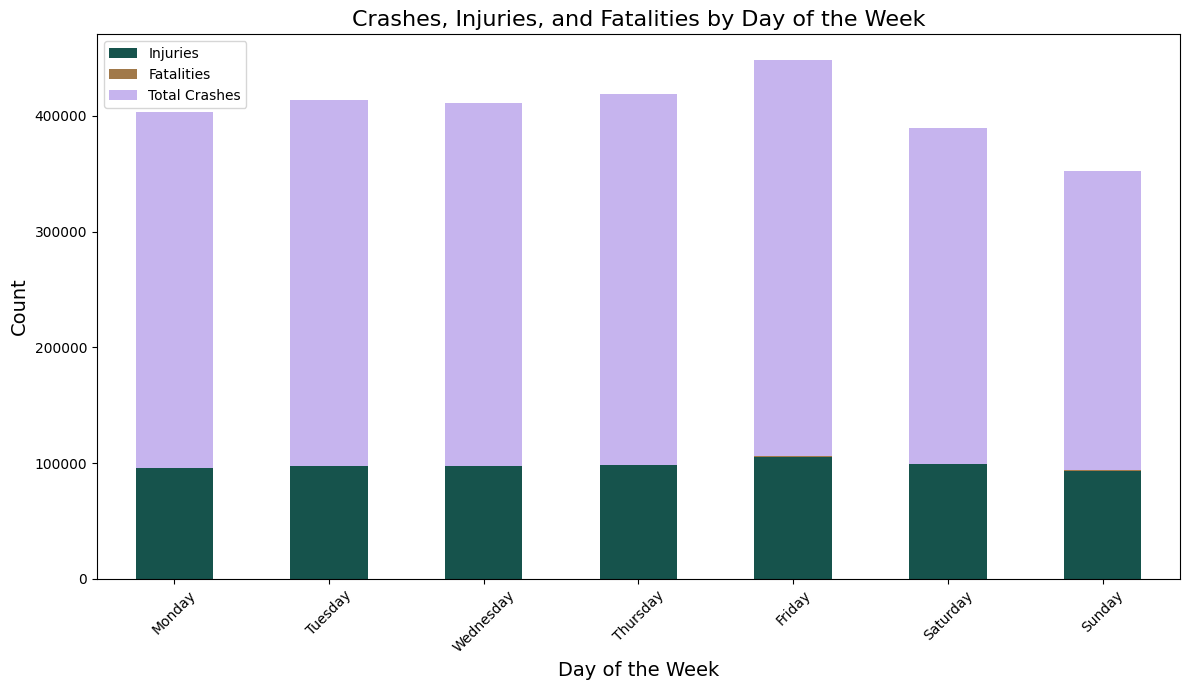

In [ ]:
# Create a Visualization
import seaborn as sns

# Set the color palette to 'cubehelix'
sns.set_palette("cubehelix")

# Create the grouped bar plot
plt.figure(figsize=(12, 7))
weekly_data.plot(kind='bar', figsize=(12, 7), stacked=True, color=sns.color_palette("cubehelix", n_colors=3))

# Add titles and labels
plt.title('Crashes, Injuries, and Fatalities by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.legend(['Injuries', 'Fatalities', 'Total Crashes'], loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


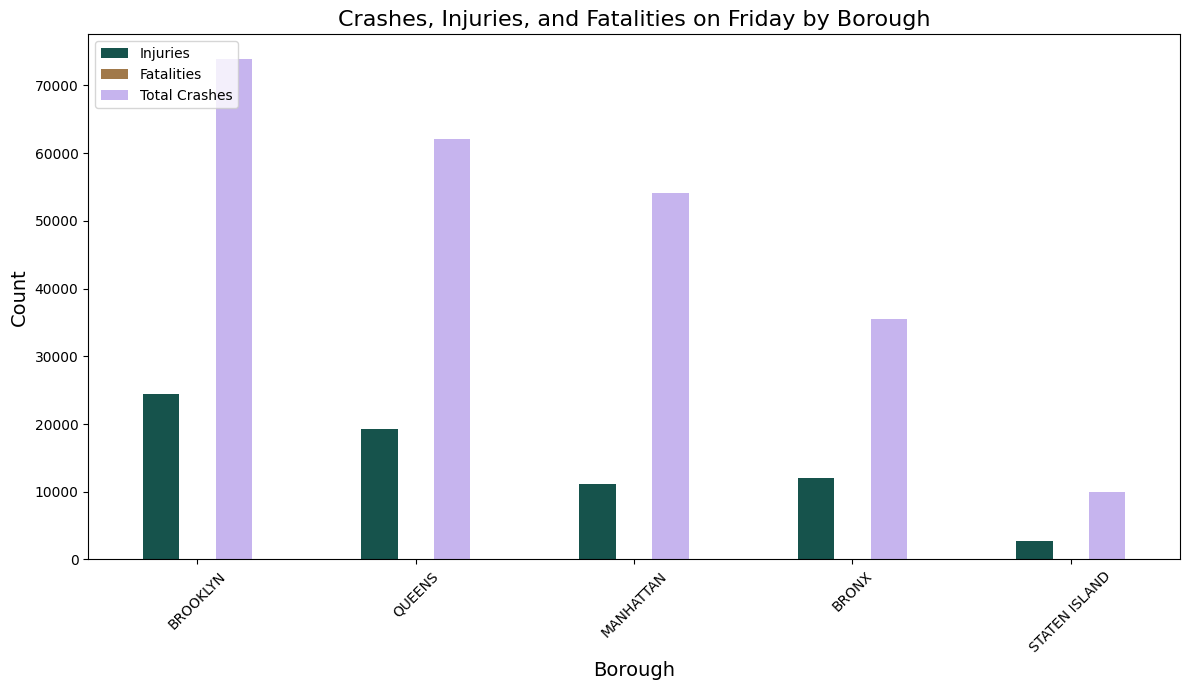

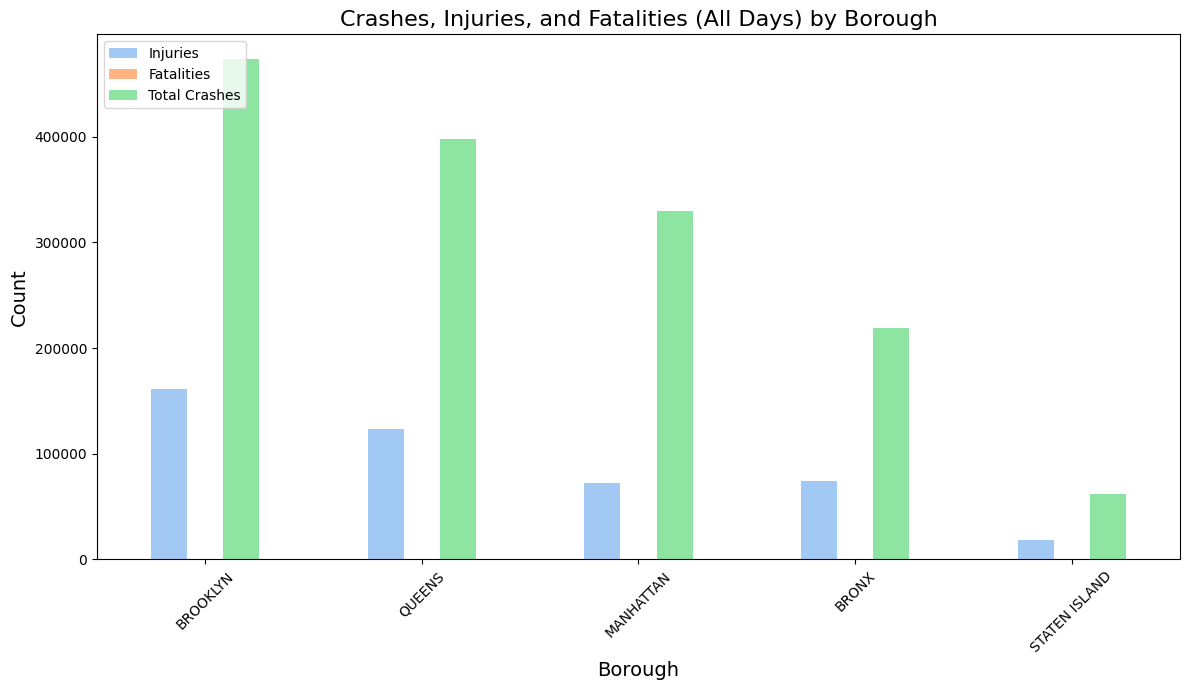

In [ ]:
# Compare All Days and Fridays by Borough
# Group All Days Data by Borough
borough_data = data.groupby('BOROUGH').agg({
    'NUMBER OF PERSONS INJURED': 'sum',
    'NUMBER OF PERSONS KILLED': 'sum',
    'CRASH DATE': 'count'  # Total crashes
}).rename(columns={'CRASH DATE': 'Total Crashes'})

# Drop rows with missing boroughs
borough_data = borough_data.dropna()

# Sort by Total Crashes
borough_data = borough_data.sort_values('Total Crashes', ascending=False)


# Filter the Crashes that Occurred on Fridays
friday_data = data[data['Day of Week'] == 'Friday']
borough_friday_data = friday_data.groupby('BOROUGH').agg({
    'NUMBER OF PERSONS INJURED': 'sum',
    'NUMBER OF PERSONS KILLED': 'sum',
    'CRASH DATE': 'count'
}).rename(columns={'CRASH DATE': 'Total Crashes'})

# Drop rows with missing boroughs
borough_friday_data = borough_friday_data.dropna()

# Sort by Total Crashes
borough_friday_data = borough_friday_data.sort_values('Total Crashes', ascending=False)



# Plot Friday-specific data
borough_friday_data.plot(kind='bar', figsize=(12, 7), stacked=False, color=sns.color_palette("cubehelix", n_colors=3))
plt.title('Crashes, Injuries, and Fatalities on Friday by Borough', fontsize=16)
plt.xlabel('Borough', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(['Injuries', 'Fatalities', 'Total Crashes'], loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot All Days data
borough_data.plot(kind='bar', figsize=(12, 7), stacked=False, color=sns.color_palette("pastel", n_colors=3))
plt.title('Crashes, Injuries, and Fatalities (All Days) by Borough', fontsize=16)
plt.xlabel('Borough', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(['Injuries', 'Fatalities', 'Total Crashes'], loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Summary Based on the Visualizations**:

The analysis reveals that **Friday consistently sees the highest number of crashes, injuries, and fatalities** compared to other days of the week. This trend may be attributed to increased traffic volume due to end-of-week commuting and social activities, as well as potential fatigue or reduced attentiveness after a workweek. Alcohol-related incidents may also play a role in the higher crash numbers on Fridays. When examining borough-specific data, **Brooklyn consistently records the most crashes**, followed by **Queens** and **Manhattan**, both on Fridays and across all days of the week. This pattern is likely due to Brooklyn's large population, high vehicle density, and mixed-use areas, while Queens' extensive highway network and busy residential-commercial zones contribute to its elevated crash counts.

The findings highlight the need for targeted traffic safety interventions in **Brooklyn** and **Queens**, such as improved infrastructure, enhanced law enforcement presence, and public awareness campaigns. Friday-specific measures, such as promoting public transit use, implementing DUI checkpoints, or encouraging staggered work hours, could further mitigate crashes. Meanwhile, **Staten Island**, with its smaller population and lower vehicle density, consistently reports the fewest crashes, underscoring the influence of urban density on traffic incidents.